In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
import plotly.express as px
%matplotlib inline

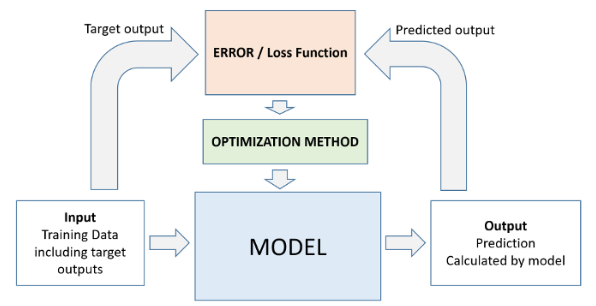
<br>
*Source: Jovian*

# EDA

In [ ]:
medical_charges = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [ ]:
medical_df = pd.read_csv(medical_charges)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
medical_df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:

fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.01, height=700, width=1000)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x="bmi", marginal="box", color_discrete_sequence=["red"], title="Distribution of BMI (Body Mass Index)")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

# looks like a gaussian distribution

In [ ]:
fig = px.histogram(medical_df, x="charges", marginal="box", color="smoker", color_discrete_sequence=["green", "grey"], title="Distribution of Medical Charges")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

# power law type of graph

In [ ]:
fig = px.histogram(medical_df, x="sex", marginal="box", color="smoker", color_discrete_sequence=["green", "grey"], title="Distribution of Sex")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x="region", marginal="box", color="smoker", color_discrete_sequence=["green", "grey"], title="Distribution of Region wrt Smokers")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x="children", marginal="box", color="smoker", color_discrete_sequence=["green", "grey"], title="Distribution of Children wrt smoking")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x="region", marginal="box", color="children", color_discrete_sequence=["green", "grey"], title="Distribution of region wrt children")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
fig = px.histogram(medical_df, x="smoker", color="sex", title="Sex")
fig.update_layout(bargap=0.1, height=700, width=1000)
fig.show()

In [ ]:
fig = px.scatter(medical_df, x="age", y="charges", color="smoker", opacity=0.8, hover_data=["sex"], title="Age vs Charges")
fig.update_layout(height=700, width=1000)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df, x="bmi", y="charges", color="smoker", opacity=0.8, hover_data=["sex"], title="Age vs Charges")
fig.update_layout(height=700, width=1000)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
f"Correlation of charges with age: {medical_df.charges.corr(medical_df.age)}"

'Correlation of charges with age: 0.2990081933306476'

In [ ]:
f"Correlation of charges with bmi: {medical_df.charges.corr(medical_df.bmi)}"

'Correlation of charges with bmi: 0.19834096883362895'

In [ ]:
f"Correlation of charges with children: {medical_df.charges.corr(medical_df.children)}"

'Correlation of charges with children: 0.06799822684790478'

In [ ]:
medical_df["smoker"] = medical_df["smoker"].map(
    {"yes": 1,
     "no": 0}
)

In [ ]:
medical_df["smoker"].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [ ]:
f"Correlation of charges with smokers (yes/no): {medical_df.charges.corr(medical_df.smoker)}"

'Correlation of charges with smokers (yes/no): 0.787251430498478'

In [ ]:
medical_df["sex"] = medical_df["sex"].map(
    {"male": 1,
     "female": 0}
)

In [ ]:
medical_df["sex"].head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [ ]:
f"Correlation of charges with sex: {medical_df.charges.corr(medical_df.sex)}"

'Correlation of charges with sex: 0.057292062202025484'

In [ ]:
medical_df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
f"Correlation of smoker with age: {medical_df.smoker.corr(medical_df.age)}"

'Correlation of smoker with age: -0.025018751536285088'

In [ ]:
medical_df.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation')

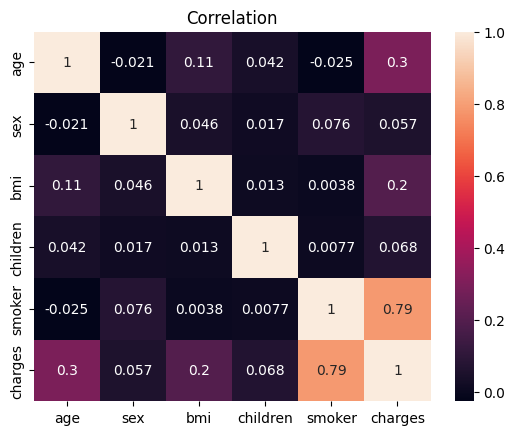

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True)
plt.title("Correlation")

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 0]

<Axes: xlabel='age', ylabel='charges'>

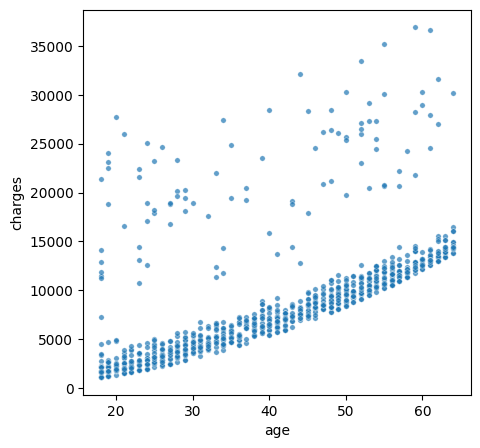

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x="age", y="charges", data=non_smoker_df, s=15, alpha=0.7)

# Model Creation: Linear Regression using Single Feature (univariate)

## No Smokers

### Linear Regression Model from Scratch

**A line on the X&Y coordinates has the following formula:<br> y = (w * x) + b**
<br><br>
**Our Model: the x-axis shows "age" and the y-axis shows "charges". Thus, the following linear relationship between the two: <br>charges = (w * age) + b**

In [ ]:
# function to compute 'charges', given 'age', 'w' and 'b'

def estimate_charges(age, w, b):
  return ((w*age)+b)

In [ ]:
# assume values of w and b, and update
w = 180
b = 0

In [ ]:
estimate_charges(20, w, b)

3600

In [ ]:
ages = non_smoker_df.age
ages.head()

1    18
2    28
3    33
4    32
5    31
Name: age, dtype: int64

In [ ]:
# pass the ages in the estimate_charges function
estimated_charges = estimate_charges(ages, w, b)
estimated_charges = pd.DataFrame(estimated_charges)
estimated_charges.rename(columns={"age": "estimated_charges"}, inplace=True)
estimated_charges.head()

,estimated_charges
1,3240
2,5040
3,5940
4,5760
5,5580


**Then check next line and compare the output**

In [ ]:
non_smoker_df.charges.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

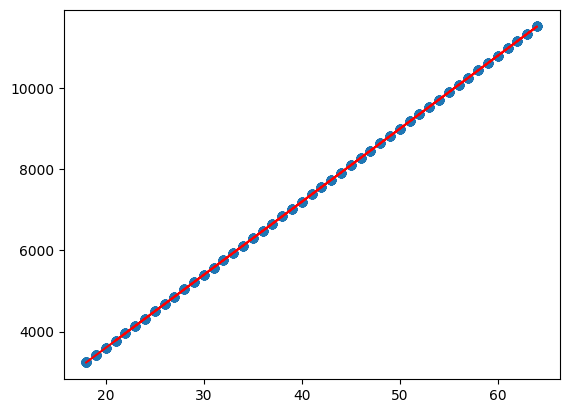

In [ ]:
plt.plot(ages, estimated_charges, 'r-')
plt.scatter(ages, estimated_charges)

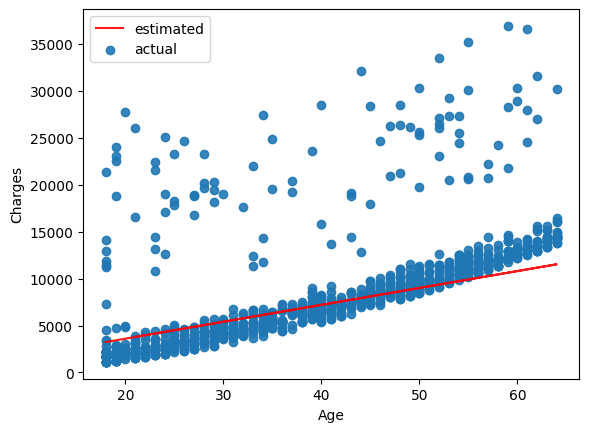

In [ ]:
# plot the above graph on actual data

target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9, label="estimated")
plt.scatter(ages, target, alpha=0.9, label="actual")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()

In [ ]:
# function to try various values of w, b

def try_parameters(w, b):

  ages = non_smoker_df.age
  target = non_smoker_df.charges # target values is charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9, label="estimated")
  plt.scatter(ages, target, alpha=0.9, label="actual", s=5)

  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

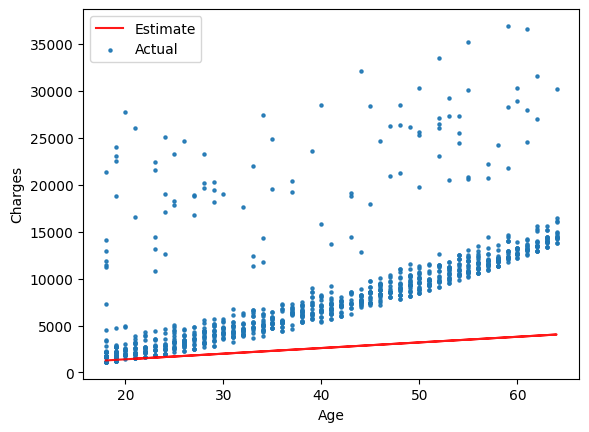

In [ ]:
try_parameters(60, 200)

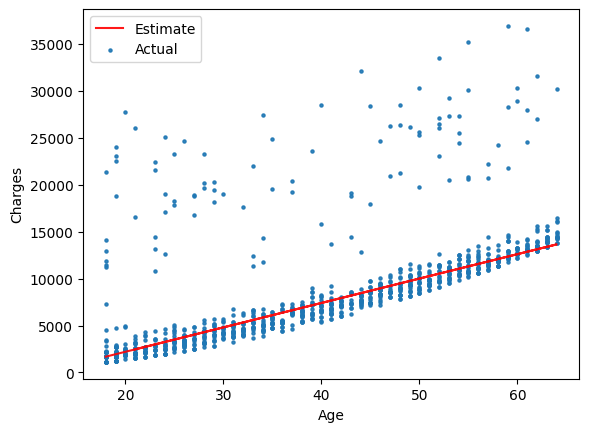

In [ ]:
try_parameters(260, -3000)

In [ ]:
def rmse(targets, predictions):
  return f"Loss: {np.sqrt(np.mean((targets-predictions)**2))}"

In [ ]:
w = 270
b = -3000

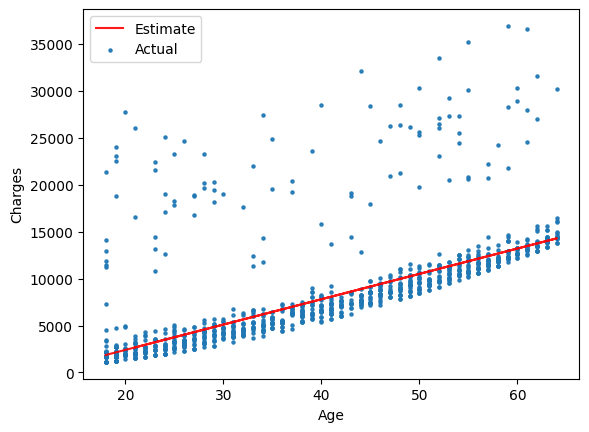

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predictions) # on average, each element in the prediction differs from the actual target by the rmse value

'Loss: 4730.837444535129'

### Linear Regression Model Using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [ ]:
help(linear_model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df["charges"]

print(f"inputs.shape = {inputs.shape}")
print(f"targets.shape = {targets.shape}")

inputs.shape = (1064, 1)
targets.shape = (1064,)


In [ ]:
linear_model.fit(inputs, targets)

LinearRegression()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [ ]:
# make predictions using the model; predict charges for the ages 23, 37, 61

linear_model.predict(np.array([[23], [37], [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
# predict for all ages from the data
predictions = linear_model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets[:5]

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [ ]:
# use the rmse function to check errors
rmse(targets, predictions)

'Loss: 4662.505766636395'

In [ ]:
# w value; can be found using the following attribute
linear_model.coef_

array([267.24891283])

In [ ]:
# b
linear_model.intercept_

-2091.4205565650864

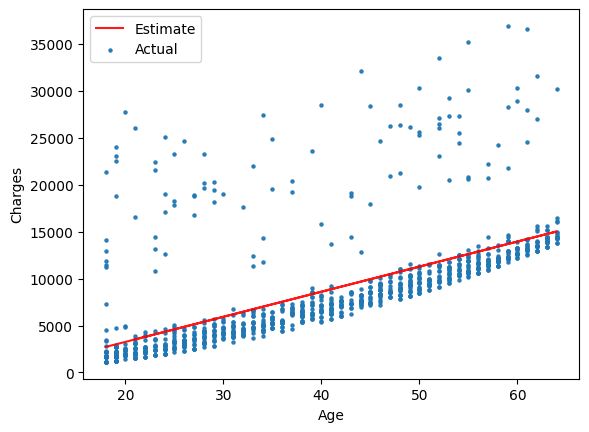

In [ ]:
final_w = linear_model.coef_
final_b = linear_model.intercept_

try_parameters(final_w, final_b)

### SGDRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
sgd_model = SGDRegressor()
sgd_model

SGDRegressor()

In [ ]:
sgd_model.fit(inputs, targets)

SGDRegressor()

In [ ]:
sgd_model.predict(np.array([[23], [37], [61]]))

array([ 2650.29552437,  6841.90354619, 14027.51729789])

In [ ]:
sgd_model.predict(inputs)

array([1153.29265943, 4147.2983893 , 5644.30125424, ..., 1153.29265943,
       1153.29265943, 2051.49437839])

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
error_sgd = sgd_model.predict(inputs) - targets
sum(error_sgd)

-934397.4415279898

In [ ]:
X = non_smoker_df.drop("charges", axis=1)
y = non_smoker_df["charges"]

categorical_cols = ['sex', 'region']
numerical_cols = ['age', 'bmi', 'children']

numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = SGDRegressor(max_iter=1000, tol=1e-3)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error for Non-Smokers: {mse}")

Mean Squared Error for Non-Smokers: 19023259.337729562


# Model Creation: Linear Regression using Multiple Features

## Attempt 1

In [ ]:
# create inputs and targets

inputs_2, targets_2 = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"] # y = w1*age + w2*bmi + b

model_2 = LinearRegression().fit(inputs_2, targets_2)

predictions_2 = model_2.predict(inputs_2)

loss_2 = rmse(targets_2, predictions_2)
print(f"{loss_2}")

Loss: 4662.3128354612945


- If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
- If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
- If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## Attempt 2: One Hot Encoding

In [ ]:
inputs_3, targets_3 = medical_df[["age", "bmi", "children", "sex", "smoker"]], medical_df["charges"]

model_3 = LinearRegression().fit(inputs_3, targets_3)

predictions_3 = model_3.predict(inputs_3)

loss_3 = rmse(targets_3, predictions_3)
print(loss_3)

Loss: 6056.100708754546


In [ ]:
# one hot encoding
from sklearn import preprocessing

enc_3 = preprocessing.OneHotEncoder()
enc_3.fit(medical_df[["region"]])
enc_3.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot_3 = enc_3.transform(medical_df[["region"]]).toarray()
one_hot_3

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot_3
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


**Model after one hot encoding**

In [ ]:
inputs_cols_4 = ['age', 'bmi', 'children', 'smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
inputs_4, targets_4 = medical_df[inputs_cols_4], medical_df['charges']

model_4 = LinearRegression().fit(inputs_4, targets_4)

predictions_4 = model_4.predict(inputs_4)

loss_4 = rmse(targets_4, predictions_4)
print('Loss:', loss_4)

Loss: Loss: 6041.6796511744515


## Attempt 3: Feature Scaling

In [ ]:
# model improvements

# feature scaling

from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']

scaler_5 = StandardScaler()
scaler_5.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler_5.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler_5.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs_5 = scaler_5.transform(medical_df[numeric_cols])
scaled_inputs_5

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs_5 = np.concatenate((scaled_inputs_5, categorical_data), axis=1)
targets_5 = medical_df.charges

# Create and train the model
model_5 = LinearRegression().fit(inputs_5, targets_5)

# Generate predictions
predictions_5 = model_5.predict(inputs_5)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: Loss: 4662.505766636395
